# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 17

Group Members:
- Venantius Sean Ardi Nugroho (13522078)
- Muhammad Atpur Rafif (13522086)
- Andhika Tantyo Anugrah (13522094)
- M. Hanief Fatkhan Nasrullah (13522100)

## Import Libraries

In [7]:
import pandas as pd
import numpy as np

# Import other libraries if needed
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
# import category_encoders as ce
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from time import time
import matplotlib.pyplot as plt
from os.path import isfile

pd.options.mode.chained_assignment = None

## Import Dataset

In [8]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public
ids = [
    "1xwUXoI2ue5WgPB4nRAqebZnMBi-VGrym",
    "1eIm8vecx0vQxNiOHxx5sCv6AL1Pq4aI9",
    "1N5WwS1etLifpc0wFIyCOFoJxRy26AGec",
    "12QU5ztSTrynRkhaRWAjvsUFTIc6lrobT",
    "1ZuhtixQiGHi0_bkQe9IKFvzN77F19Qkl",
    "1uT-BDxltvRSFpW4OWtxXA2hiu90T4ElP"
]

link = "https://drive.google.com/uc?id="
trainDataset = []

for id in ids:
    filename = id + ".csv"
    url = link + id

    df = None
    if isfile(filename):
        df = pd.read_csv(filename)
    else:
        df = pd.read_csv(url)
        df.to_csv(filename, index=False)

    trainDataset.append(df)

In [9]:
df = trainDataset[0].set_index('id')
for i in range(1, len(trainDataset)):
    df = df.join(trainDataset[i].set_index('id'))
df.reset_index()

df.insert(len(df.columns.values)-1, 'attack_cat', df.pop('attack_cat'))
df = df[(df["state"] != "URN")]
df

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,proto,label,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,attack_cat
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,11.0,NaN,5.0,4.0,2.0,...,tcp,0,4449.110313,3234.831566,11.845558,6.261361,NaN,0.000444,0.000114,Normal
1,0.0,2.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,NaN,...,udp,1,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,NaN,Generic
2,0.0,NaN,0.0,0.0,0.0,4.0,4.0,2.0,2.0,1.0,...,tcp,1,8561.040438,249.950547,165.386453,172.345750,0.158826,0.057902,0.100924,Exploits
3,0.0,0.0,0.0,0.0,0.0,9.0,9.0,3.0,2.0,2.0,...,tcp,0,4053.086020,2918.730804,8.669644,4.496707,0.000558,0.000448,NaN,Normal
4,0.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,1.0,...,udp,0,0.000000,0.000000,0.008000,0.007000,0.000000,0.000000,0.000000,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.0,2.0,0.0,0.0,0.0,38.0,38.0,32.0,NaN,32.0,...,udp,1,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,Generic
175337,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,3.0,NaN,...,tcp,1,15464.286700,531.848125,193.445428,209.600766,0.066524,0.047738,0.018786,Exploits
175338,0.0,2.0,0.0,NaN,0.0,33.0,33.0,16.0,16.0,16.0,...,udp,1,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,Generic


# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

### Categorical Feature & Numerical Feature

In [10]:
categoricalFeatures = []
numericalFeatures = []
for col in df.columns:
  if df[col].dtypes == 'object' or df[col].nunique() == 2:
    categoricalFeatures.append(col)
  else:
    numericalFeatures.append(col)
df[categoricalFeatures] = df[categoricalFeatures].astype("category")
pd.DataFrame({
    "Column": df.keys(),
    "Type": map(lambda v: df[v].dtype, df.keys())
})

,Column,Type
0,is_sm_ips_ports,category
1,ct_state_ttl,float64
2,ct_flw_http_mthd,float64
3,is_ftp_login,float64
4,ct_ftp_cmd,float64
5,ct_srv_src,float64
6,ct_srv_dst,float64
7,ct_dst_ltm,float64
8,ct_src_ltm,float64
9,ct_src_dport_ltm,float64


### How's the Missing Data in Each Attribute is Represented, and The Amount for Each Attribute

In [11]:
# Write your code here
representation = []
for col in df.columns:
    unique_values = df[col].unique()
    value = None
    if df[col].isnull().any():
        value = 'NaN/None'
    elif (df[col] == '').any():
        value = "'' (Empty String)"
    # Check for custom missing value placeholders (if any idk)
    elif df[col].isin([999, -1, 'unknown']).any():
        missing_values = df[col][df[col].isin([999, -1, 'unknown'])].unique()
        value = list(missing_values)
    else:
        value ='No missing values'
    representation.append(value)

missing = []
for col in df.columns:
    missing.append(df[col].isnull().sum())

pd.DataFrame({
    'Column': df.columns, 
    'Representation': representation,
    'Amount': missing 
})

,Column,Representation,Amount
0,is_sm_ips_ports,NaN/None,8746
1,ct_state_ttl,NaN/None,8635
2,ct_flw_http_mthd,NaN/None,8646
3,is_ftp_login,NaN/None,8647
4,ct_ftp_cmd,NaN/None,8842
5,ct_srv_src,NaN/None,8851
6,ct_srv_dst,NaN/None,8774
7,ct_dst_ltm,NaN/None,8737
8,ct_src_ltm,NaN/None,8823
9,ct_src_dport_ltm,NaN/None,8775


# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [12]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...
# x = df.drop(['attack_cat','label'],axis=1)
# y = df['attack_cat'] #label bisa diinfer dari attack_cat
# xTrain,xVal,yTrain,yVal = train_test_split(x,y, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(df, test_size=0.3, random_state=42)
train_set

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,proto,label,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,attack_cat
id,,,,,,,,,,,,,,,,,,,,,
88529,0.0,0.0,1.0,0.0,0.0,1.0,3.0,2.0,1.0,1.0,...,tcp,0,8800.855931,7707.010223,85.333464,65.565059,0.000623,NaN,NaN,Normal
159772,0.0,1.0,0.0,0.0,0.0,6.0,7.0,1.0,2.0,1.0,...,tcp,0,4126.369768,198.481250,71.959444,124.898602,0.114996,NaN,0.054763,Normal
34228,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,tcp,1,1570.647747,59.436129,28.803667,34.876570,0.056531,0.008854,0.047677,Exploits
165610,0.0,2.0,0.0,0.0,0.0,4.0,4.0,1.0,1.0,1.0,...,ipv6-frag,1,0.000000,0.000000,0.001000,NaN,0.000000,0.000000,0.000000,Exploits
129991,0.0,0.0,0.0,0.0,0.0,5.0,3.0,1.0,3.0,2.0,...,udp,0,0.000000,0.000000,NaN,0.002000,0.000000,0.000000,0.000000,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119880,0.0,6.0,0.0,0.0,0.0,10.0,10.0,5.0,5.0,1.0,...,tcp,0,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,Normal
103695,0.0,2.0,0.0,NaN,NaN,13.0,13.0,13.0,13.0,13.0,...,udp,1,0.000000,0.000000,0.004000,0.000000,0.000000,0.000000,0.000000,Generic
131933,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,1.0,NaN,...,tcp,1,2146.433327,101.525602,40.966222,66.623602,0.091489,0.064411,0.027078,Exploits


# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [13]:
# Using mode imputation for categorical features
# Using median imputation for numerical features
class DataImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.categorical_imputer = None                   # Placeholder for categorical imputer
        self.numerical_imputer = None                     # Placeholder for numerical imputer
        self.missing_value_counts_ = None                 # To store missing value counts

    def fit(self, X, y=None):
        # Separate categorical and numerical columns
        categorical_cols = X.select_dtypes(include=['category']).columns
        numerical_cols = X.select_dtypes(exclude=['category']).columns

        # Initialize and fit imputers
        self.categorical_imputer = SimpleImputer(strategy='most_frequent')
        self.numerical_imputer = SimpleImputer(strategy='median')

        self.categorical_imputer.fit(X[categorical_cols])
        self.numerical_imputer.fit(X[numerical_cols])

        # Calculate missing value counts
        self.missing_value_counts_ = X.isnull().sum().to_dict()

        return self

    def transform(self, X, y=None):
        # Create a copy of the dataset to avoid modifying the original data
        X = X.copy()

        # Separate categorical and numerical columns
        categorical_cols = X.select_dtypes(include=['category']).columns
        numerical_cols = X.select_dtypes(exclude=['category']).columns

        # Apply imputations
        X[categorical_cols] = self.categorical_imputer.transform(X[categorical_cols])
        X[numerical_cols] = self.numerical_imputer.transform(X[numerical_cols])

        X[categorical_cols] = X[categorical_cols].astype("category")

        return X

    def get_missing_value_counts(self):
        """Return the dictionary of missing value counts."""
        return self.missing_value_counts_

dataImputer = DataImputer()
dataImputer.fit_transform(train_set)

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,proto,label,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,attack_cat
id,,,,,,,,,,,,,,,,,,,,,
88529,0.0,0.0,1.0,0.0,0.0,1.0,3.0,2.0,1.0,1.0,...,tcp,0,8800.855931,7707.010223,85.333464,65.565059,0.000623,0.000000,0.000000,Normal
159772,0.0,1.0,0.0,0.0,0.0,6.0,7.0,1.0,2.0,1.0,...,tcp,0,4126.369768,198.481250,71.959444,124.898602,0.114996,0.000000,0.054763,Normal
34228,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,tcp,1,1570.647747,59.436129,28.803667,34.876570,0.056531,0.008854,0.047677,Exploits
165610,0.0,2.0,0.0,0.0,0.0,4.0,4.0,1.0,1.0,1.0,...,ipv6-frag,1,0.000000,0.000000,0.001000,0.006000,0.000000,0.000000,0.000000,Exploits
129991,0.0,0.0,0.0,0.0,0.0,5.0,3.0,1.0,3.0,2.0,...,udp,0,0.000000,0.000000,0.287693,0.002000,0.000000,0.000000,0.000000,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119880,0.0,6.0,0.0,0.0,0.0,10.0,10.0,5.0,5.0,1.0,...,tcp,0,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,Normal
103695,0.0,2.0,0.0,0.0,0.0,13.0,13.0,13.0,13.0,13.0,...,udp,1,0.000000,0.000000,0.004000,0.000000,0.000000,0.000000,0.000000,Generic
131933,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,1.0,1.0,...,tcp,1,2146.433327,101.525602,40.966222,66.623602,0.091489,0.064411,0.027078,Exploits


Dalam penanganan pada data yang hilang, metode yang digunakan oleh penulis adalah imputasi dengan mean pada fitur - fitur numerical, sedangkan imputasi dengan modus pada fitur - fitur categorical. Metode tersebut memiliki beberapa kelebihan, selain sederhana dan cepat dalam implementasi dan waktu komputasi, metode ini unggul dibanding metode berbasis penghapusan karena menjaga kelengkapan data. Metode ini juga memiliki kelebihan dibanding metode berbasis interpolasi dalam hal mengurangi overfitting.

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [14]:
#using quantile capping at first and third quartile
class QuantileCapper(BaseEstimator, TransformerMixin):
    def __init__(self):
        """
        Parameters:
        - lower_quantile: float, the lower quantile for capping (default=0.25)
        - upper_quantile: float, the upper quantile for capping (default=0.75)
        """
        self.lower_cap_ = None
        self.upper_cap_ = None

    def fit(self, X, y=None):
        """
        Learns the quantile values for capping.
        Parameters:
        - X: DataFrame, input data with numerical columns
        - y: Ignored
        """
        # Select only numerical columns
        self.lower_cap_ = X.select_dtypes(include=np.number).quantile(0.25)
        self.upper_cap_ = X.select_dtypes(include=np.number).quantile(0.75)
        return self

    def transform(self, X, y=None):
        """
        Caps the numerical values in the DataFrame based on the learned quantiles.
        Parameters:
        - X: DataFrame, input data with numerical columns
        - y: Ignored
        Returns:
        - DataFrame with capped values
        """
        # Copy the input data to avoid modifying the original
        X = X.copy()
        # Select only numerical columns
        numerical_cols = X.select_dtypes(include=np.number).columns
        # Cap values based on learned quantiles
        X[numerical_cols] = X[numerical_cols].clip(lower=self.lower_cap_, upper=self.upper_cap_, axis=1)
        return X

quantileCapper = QuantileCapper() 
quantileCapper.fit_transform(train_set)

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,proto,label,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,attack_cat
id,,,,,,,,,,,,,,,,,,,,,
88529,0.0,1.0,0.0,0.0,0.0,2.0,3.0,2.0,2.0,1.0,...,tcp,0,2521.233164,115.563004,55.604738,51.33980,0.000623,NaN,NaN,Normal
159772,0.0,1.0,0.0,0.0,0.0,6.0,7.0,1.0,2.0,1.0,...,tcp,0,2521.233164,115.563004,55.604738,51.33980,0.065949,NaN,0.039141,Normal
34228,0.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,2.0,1.0,...,tcp,1,1570.647747,59.436129,28.803667,34.87657,0.056531,0.008854,0.039141,Exploits
165610,0.0,2.0,0.0,0.0,0.0,4.0,4.0,1.0,2.0,1.0,...,ipv6-frag,1,0.000000,0.000000,0.008000,NaN,0.000000,0.000000,0.000000,Exploits
129991,0.0,1.0,0.0,0.0,0.0,5.0,3.0,1.0,3.0,2.0,...,udp,0,0.000000,0.000000,NaN,0.00200,0.000000,0.000000,0.000000,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119880,0.0,2.0,0.0,0.0,0.0,10.0,10.0,5.0,5.0,1.0,...,tcp,0,0.000000,0.000000,0.008000,0.00000,0.000000,0.000000,0.000000,Normal
103695,0.0,2.0,0.0,NaN,NaN,12.0,12.0,7.0,9.0,5.0,...,udp,1,0.000000,0.000000,0.008000,0.00000,0.000000,0.000000,0.000000,Generic
131933,0.0,1.0,0.0,0.0,0.0,2.0,2.0,4.0,2.0,NaN,...,tcp,1,2146.433327,101.525602,40.966222,51.33980,0.065949,0.023856,0.027078,Exploits


Metode yang digunakan dalam penanganan outlier adalah dengan melakukan flooring ke kuartil pertama dan capping pada kuartil ketiga bila suatu data melewati threshold tersebut. Alasan penggunaan metode ini adalah karena dengan metode ini, kelengkapan dan distribusi data dapat terjaga. 

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [15]:
class DuplicateRemover(BaseEstimator, TransformerMixin):
    def __init__(self): 
        self.estimator_ = None
    
    def fit(self, X, y=None):
        self.keep_ = 'first'
        return self

    def transform(self, X, y=None):
        X = X.copy()
        return X.drop_duplicates(keep=self.keep_)

duplicateRemover = DuplicateRemover() 
duplicateRemover.fit_transform(train_set)

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,proto,label,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,attack_cat
id,,,,,,,,,,,,,,,,,,,,,
88529,0.0,0.0,1.0,0.0,0.0,1.0,3.0,2.0,1.0,1.0,...,tcp,0,8800.855931,7707.010223,85.333464,65.565059,0.000623,NaN,NaN,Normal
159772,0.0,1.0,0.0,0.0,0.0,6.0,7.0,1.0,2.0,1.0,...,tcp,0,4126.369768,198.481250,71.959444,124.898602,0.114996,NaN,0.054763,Normal
34228,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,tcp,1,1570.647747,59.436129,28.803667,34.876570,0.056531,0.008854,0.047677,Exploits
165610,0.0,2.0,0.0,0.0,0.0,4.0,4.0,1.0,1.0,1.0,...,ipv6-frag,1,0.000000,0.000000,0.001000,NaN,0.000000,0.000000,0.000000,Exploits
129991,0.0,0.0,0.0,0.0,0.0,5.0,3.0,1.0,3.0,2.0,...,udp,0,0.000000,0.000000,NaN,0.002000,0.000000,0.000000,0.000000,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119880,0.0,6.0,0.0,0.0,0.0,10.0,10.0,5.0,5.0,1.0,...,tcp,0,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,Normal
103695,0.0,2.0,0.0,NaN,NaN,13.0,13.0,13.0,13.0,13.0,...,udp,1,0.000000,0.000000,0.004000,0.000000,0.000000,0.000000,0.000000,Generic
131933,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,1.0,NaN,...,tcp,1,2146.433327,101.525602,40.966222,66.623602,0.091489,0.064411,0.027078,Exploits


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [16]:
class OneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.unique_categories = None

    def fit(self, X: pd.DataFrame, y=None):
        self.unique_categories = {col: X[col].unique() for col in X.select_dtypes(include=["category"]).columns}
        return self

    def transform(self, X, y=None):
        """Replace categorical columns with the aggregated statistics learned in `fit`."""
        X = X.copy()
        for cat_col in self.unique_categories:
          oneHot = pd.get_dummies(X[cat_col], prefix=cat_col).astype(int)
          X = X.drop(cat_col, axis=1)
          X = pd.concat([X, oneHot], axis=1)
        return X

In [17]:
def correlate_to_categorical(X: pd.DataFrame, target: str):
    X = X.copy()
    target_data = OneHotEncoder().fit_transform(X[[target]])
    categorical_data = X.select_dtypes(include=['category'])
    numerical_data = X.select_dtypes(exclude=['category'])

    cols = []
    col_cors = []
    for col, ser in numerical_data.items():
        cors = list(map(lambda w: ser.corr(w[1]), target_data.items()))
        cor = np.average(np.abs(cors))
        cols.append(col)
        col_cors.append(cor)
        # print(col, cor)

    for col in categorical_data.keys():
        if col == target:
            continue 
            
        ser = OneHotEncoder().fit_transform(categorical_data[[col]])
        corss = []
        for clazz in ser.keys(): 
            if np.sum(ser[clazz]) == 0:
                continue
            cors = list(map(lambda w: ser[clazz].corr(w[1]), target_data.items()))
            cor = np.average(np.abs(cors)) 
            corss.append(cor)
        cor = np.max(corss)
        cols.append(col)
        col_cors.append(cor)
    
    return pd.DataFrame({
        "Column": cols,
        "Correlation": col_cors
    })

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, threshold, target):
        self.threshold = threshold
        self.target = target
        self.selected_features_ = []

    def fit(self, X: pd.DataFrame, y=None):
        dc = correlate_to_categorical(train_set, self.target)
        self.selected_features_ = list(dc[dc["Correlation"] > self.threshold]["Column"])
        return self

    def transform(self, X, y=None):
        return X[[*self.selected_features_, self.target]]

FeatureSelector(threshold=0.1, target="attack_cat").fit_transform(train_set)

,ct_state_ttl,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,sttl,dttl,...,stcpb,dtcpb,dmean,tcprtt,ackdat,state,service,proto,label,attack_cat
id,,,,,,,,,,,,,,,,,,,,,
88529,0.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,31.0,29.0,...,6.307289e+08,6.322088e+08,565.0,0.000623,NaN,FIN,http,tcp,0,Normal
159772,1.0,6.0,7.0,1.0,2.0,1.0,1.0,5.0,254.0,252.0,...,3.540220e+09,9.668531e+08,45.0,0.114996,0.054763,FIN,-,tcp,0,Normal
34228,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,62.0,252.0,...,2.927688e+08,NaN,165.0,0.056531,0.047677,FIN,NaN,tcp,1,Exploits
165610,2.0,4.0,4.0,1.0,1.0,1.0,1.0,4.0,254.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,INT,-,ipv6-frag,1,Exploits
129991,0.0,5.0,3.0,1.0,3.0,2.0,1.0,1.0,31.0,29.0,...,0.000000e+00,0.000000e+00,89.0,0.000000,0.000000,CON,dns,udp,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119880,6.0,10.0,10.0,5.0,5.0,1.0,1.0,11.0,254.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,REQ,-,tcp,0,Normal
103695,2.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,NaN,0.0,...,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,INT,dns,udp,1,Generic
131933,1.0,1.0,1.0,4.0,1.0,NaN,1.0,1.0,254.0,252.0,...,8.492880e+08,1.486195e+09,45.0,0.091489,0.027078,FIN,http,tcp,1,Exploits


## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [18]:
# Write your code here
class MinMaxScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.min_ = None
        self.max_ = None

    def fit(self, X: pd.DataFrame, y=None):
        self.min_ = X.select_dtypes(exclude=["category"]).min()
        self.max_ = X.select_dtypes(exclude=["category"]).max()
        return self

    def transform(self, X, y=None):
        X = X.copy()
        divisor = (self.max_ - self.min_)
        divisor[divisor == 0] = 1

        numerical = X.select_dtypes(exclude=["category"])
        X[numerical.columns] = (numerical - self.min_) / divisor
        
        return X

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

###  ENCODING ALREADY DONE BEFORE FEATURE SELECTION
Because we have chosen to not use any numerical data for the categorical one, then this is not needed.

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [19]:
class RandomMeanSampler(BaseEstimator, TransformerMixin):
    def __init__(self, target_col, random_state=None):
        self.target_col = target_col
        self.random_state = random_state
        self.estimator_ = None

    def fit(self, X, y=None):
        self.estimator_ = True
        return self

    def transform(self, X, y=None):
        np.random.seed(self.random_state)

        class_counts = X[self.target_col].value_counts()
        mean_class_size = int(class_counts.mean())
        sampling_strategy = {cls: mean_class_size for cls in class_counts.index}

        
        sampled_dfs = []
        for cls, n_samples in sampling_strategy.items():
            class_data = X[X[self.target_col] == cls]
            sampled_dfs.append(class_data.sample(n=n_samples, random_state=self.random_state, replace=True))
            
        return pd.concat(sampled_dfs)

# np.floor(train_set.groupby(["attack_cat"])["attack_cat"].count().mean())
RandomMeanSampler(target_col="attack_cat", random_state=42).fit_transform(train_set)

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,proto,label,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,attack_cat
id,,,,,,,,,,,,,,,,,,,,,
37183,0.0,0.0,0.0,0.0,0.0,10.0,2.0,1.0,3.0,1.0,...,NaN,0,62.964635,60.441846,1.071615,1.006985,0.000904,0.000511,0.000393,Normal
136107,0.0,2.0,0.0,0.0,0.0,8.0,8.0,3.0,3.0,3.0,...,udp,0,0.000000,0.000000,0.029000,0.000000,0.000000,0.000000,0.000000,Normal
119053,0.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0,1.0,1.0,...,tcp,0,10472.703020,7522.378660,22.524891,11.604353,0.000575,0.000457,0.000118,Normal
47460,0.0,3.0,0.0,0.0,0.0,7.0,7.0,4.0,4.0,4.0,...,tcp,0,1963.329575,0.000000,38.289000,0.007000,0.117642,0.076045,0.041597,Normal
46482,0.0,0.0,0.0,0.0,0.0,1.0,2.0,NaN,1.0,1.0,...,NaN,0,0.000000,0.000000,10000.866000,0.000000,0.000000,0.000000,0.000000,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60781,0.0,NaN,1.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,...,tcp,1,3693.623832,NaN,69.554326,12.418417,0.205233,0.101551,0.103682,Worms
156522,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,18.0,1.0,...,tcp,1,3265.305100,182.593031,63.133333,106.113203,0.102224,0.038485,0.063739,Worms
171046,NaN,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,...,tcp,1,4377.886393,209.678109,80.336556,134.386406,0.161005,0.087959,0.073046,Worms


Menggunakan gabungan antara oversampling dan undersampling karena merupakan jalan tengah dari kedua solusi. Terdapat sebuah kelas target yang memiliki titik data yang sangat kecil. Penggunaan undersampling akan mengakibatkan data menjadi 0.6% dari data awal, hal ini akan mengurangi akurasi. Sedangkan oversampling akan membuat data menjadi tiga kali lipat lebih besar dan akan menggunakan komputasi yang besar.

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

For we have chosen for ourselves, the decision to use categorical data, one shall not need any data normalization anymore.

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [20]:
class NumericalToCategoricalReduction(BaseEstimator, TransformerMixin):
    def __init__(self, binsize): 
        self.bins_ = {}
        self.binsize = binsize
        self.labels = [i + 1 for i in range(binsize)]
        
    def fit(self, X: pd.DataFrame, y=None):
        numerical = X.select_dtypes(exclude=["category"]).columns 
        for col in numerical: 
            bin = pd.cut(X[col], bins=self.binsize, labels=self.labels, retbins=True)[1]
            self.bins_[col] = bin
        return self

    def transform(self, X, y=None):
        X = X.copy() 
        for col, val in self.bins_.items(): 
            X[col] = pd.cut(X[col], bins=val, labels=self.labels)
        return X

# binsize = 5
# de = train_set["sinpkt"]
# dt[0].value_counts
# print(a, b)
NumericalToCategoricalReduction(binsize=5).fit_transform(train_set)

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,proto,label,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,attack_cat
id,,,,,,,,,,,,,,,,,,,,,
88529,0.0,1,1,1,1,1,1,1,1,1,...,tcp,0,1,1,1,1,1,NaN,NaN,Normal
159772,0.0,1,1,1,1,1,1,1,1,1,...,tcp,0,1,1,1,1,1,NaN,1,Normal
34228,0.0,1,1,1,1,1,1,1,1,1,...,tcp,1,1,1,1,1,1,1,1,Exploits
165610,0.0,2,1,1,1,1,1,1,1,1,...,ipv6-frag,1,1,1,1,NaN,1,1,1,Exploits
129991,0.0,1,1,1,1,1,1,1,1,1,...,udp,0,1,1,NaN,1,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119880,0.0,5,1,1,1,1,1,1,1,1,...,tcp,0,1,1,1,1,1,1,1,Normal
103695,0.0,2,1,NaN,NaN,1,1,2,2,2,...,udp,1,1,1,1,1,1,1,1,Generic
131933,0.0,1,1,1,1,1,1,1,1,NaN,...,tcp,1,1,1,1,1,1,1,1,Exploits


# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [21]:
# data_imputer = DataImputer(categorical_strategy='most_frequent', numerical_strategy='median')
# quantile_capper = QuantileCapper(lower_quantile=0.25, upper_quantile=0.75)
# duplicate_remover = DuplicateRemover(keep='first')
# encoder = CategoricalNumericalEncoder(categorical_cols=categoricalFeatures, numerical_cols=numericalFeatures)
# feature_selector = FeatureSelector(selected_features=['is_sm_ips_ports', 'state', 'dbytes', 'service', 'sload',
#                                                       'dload', 'stcpb', 'dtcpb', 'proto', 'sjit','attack_cat'])
# scaler = MinMaxScalerDF()
# undersampler = RandomUnderSampler(target_col='attack_cat', sampling_strategy='auto', random_state=42)
# pca_reducer = PCAReducer(n_components=5,exclude_cols=['attack_cat'])

pipe = Pipeline([
    ('data_imputer', DataImputer()),
    ('quantile_capper', QuantileCapper()),
    # ('duplicate_remover', DuplicateRemover()),
    ('feature_selector', FeatureSelector(threshold=0.1, target="attack_cat")),

    ('scaler', MinMaxScaler()),
    # ('sampler', RandomMeanSampler(target_col="attack_cat")),
    ('dimension_reducer', NumericalToCategoricalReduction(binsize=5))
    
    # ('encoder', encoder),
    
    # ('scaler', scaler),
    # ('undersampler', undersampler),
    # ('pca_reducer', pca_reducer)
])

In [22]:
# # Your code should work up until this point
pipe.fit(train_set)
train_set_piped = pipe.transform(train_set)
val_set_piped = pipe.transform(val_set)

or create your own here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [37]:
from statistics import mode
from queue import PriorityQueue

class KNN:
    def __init__(self, k: int = 1):
        self.k: int = k
        self.features_ = None
        self.target_ = None

    def fit(self, features: list[list[any]], target: list[any]):
        self.features_ = features
        self.target_ = target

    def _calculate_distance(self, xs: list[any], ys: list[any]): 
        distance = 0
        for x, y in zip(xs, ys): 
            if x != y:
                distance += 1
        return distance
        
    def predict(self, feature: list[any]):
        pq = PriorityQueue()

        i = 0
        for data, clazz in zip(self.features_, self.target_):
            distance = self._calculate_distance(data, feature)
            pq.put((distance, clazz))

        counter = {}
        for _, clazz in list(pq.queue)[:self.k]: 
            if not (clazz in counter): 
                counter[clazz] = 0
            counter[clazz] += 1

        probability = {} 
        for key, value in counter.items():
            probability[key] = value / self.k
                    
        return probability

In [40]:
knn = KNN(k=50)
_train_knn = train_set_piped.sample(frac=0.01, random_state=42)

trainStart = time()
knn.fit(_train_knn.drop(columns="attack_cat").to_numpy(), _train_knn["attack_cat"].to_numpy())
trainEnd = time()
print("Training time: "+str(trainEnd-trainStart)+"s")

reals = val_set_piped['attack_cat'].to_numpy()
predictions = []

predictStart = time()
i = 0
for row in val_set_piped.to_numpy():
    probability = knn.predict(row)
    prediction = max(probability, key=probability.get)
    predictions.append(prediction)

    i += 1
    if i == 1000: 
        break
predictEnd = time()
print("Prediction time: "+str(predictEnd-predictStart)+"s")

Training time: 0.001073598861694336s
Prediction time: 2.6772563457489014s


Accuracy: 0.759


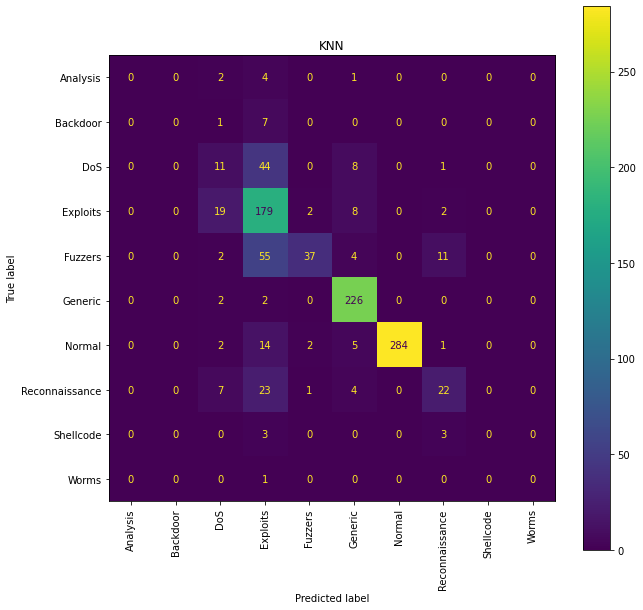

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("KNN")
ConfusionMatrixDisplay.from_predictions(reals[:1000], predictions, xticks_rotation=90, ax=ax)
acc = accuracy_score(reals[:1000], predictions)
print("Accuracy:",acc)

## B. Naive Bayes

In [20]:
class NaiveBayes:
    data_count: int
    feature_count: int

    target_class: list[any]
    target_counter: dict[any, int]
    target_probability: dict[any, float]

    feature_counter: list[dict[any, int]]
    feature_probability: list[dict[any, float]]

    def fit(self, features: list[list[any]], target: list[any]):
        self.data_count = len(features)
        self.feature_count = len(features[0])

        self.target_class = set()
        self.target_counter = {}
        for value in target:
            if not (value in self.target_counter):
                self.target_counter[value] = 0
            self.target_counter[value] += 1
            self.target_class.add(value)
        self.target_class = list(self.target_class)

        self.target_probability = {}
        for i in self.target_counter.keys():
            self.target_probability[i] = self.target_counter[i] / self.data_count

        self.feature_counter = []
        for col in range(self.feature_count):
            counter = {}
            for row in range(self.data_count):
                value = features[row][col]
                clazz = target[row]
                if not (value in counter):
                    counter[value] = {}
                if not (clazz in counter[value]):
                    counter[value][clazz] = 0
                counter[value][clazz] += 1
            self.feature_counter.append(counter)

        self.feature_probability = []
        for i in range(self.feature_count):
            self.feature_probability.append({})
            for j in self.feature_counter[i].keys():
                self.feature_probability[i][j] = {}
                for k in self.target_counter.keys():
                    value = 0
                    if k in self.feature_counter[i][j]:
                        value = self.feature_counter[i][j][k]
                    self.feature_probability[i][j][k] = value / self.target_counter[k]

    def predict(self, feature: list[any]):
        result = {}
        for clazz in self.target_class:
            probability = self.target_probability[clazz]
            for i in range(self.feature_count):
                value = feature[i]
                if not (value in self.feature_probability[i]): 
                    continue
                probability *= self.feature_probability[i][value][clazz]
            result[clazz] = probability
        return result

In [21]:
nb = NaiveBayes()
features = train_set_piped.drop(columns=["attack_cat"]).to_numpy()
target = train_set["attack_cat"].to_numpy()

trainStart = time()
nb.fit(features, target)
trainEnd = time()
print("Training time: "+str(trainEnd-trainStart)+"s")

predictions = []
reals = val_set_piped["attack_cat"].to_numpy()

predictStart = time()
for data, real in zip(val_set_piped.drop(columns=["attack_cat"]).to_numpy(), reals):
    probability = nb.predict(data) 
    prediction = max(probability, key=probability.get)
    predictions.append(prediction)
predictEnd = time()
print("Prediction time: "+str(predictEnd-predictStart)+"s")

Training time: 0.44217681884765625s
Prediction time: 1.263822317123413s


Accuracy: 0.7504277403900992


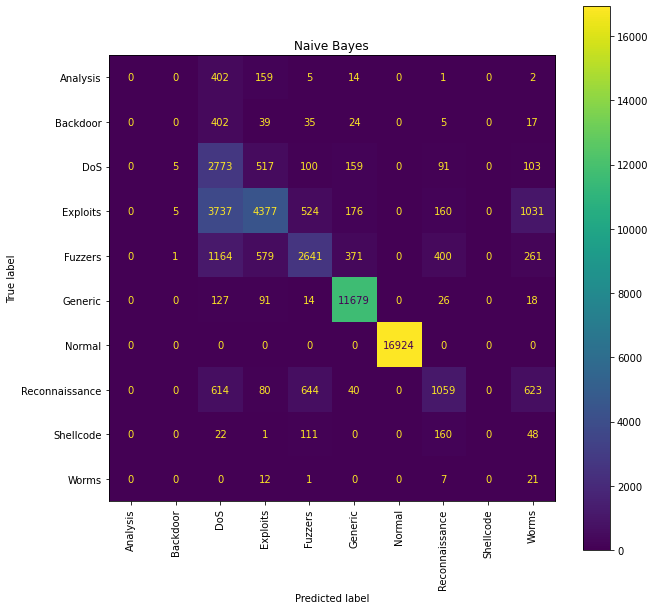

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Naive Bayes")
ConfusionMatrixDisplay.from_predictions(reals, predictions, xticks_rotation=90, ax=ax)
acc = accuracy_score(reals, predictions)
print("Accuracy:",acc)

## C. ID3

In [32]:
from math import log2
from random import choice

class ID3:
    def __init__(self, feature=None, value=None,result=None,child = {},chosen=set()):
        self.feature = feature
        self.result = result
        self.child = child
        self.chosen = chosen
        self.majority = None

    def entropy(self,data):
        value,counts = np.unique(data, return_counts=True)
        proportion = counts/len(data)
        return -np.sum([p*np.log2(p) for p in proportion if p>0])

    def splitData(self,X,y,feature,value):
        filteredIndex = np.where(X[:, feature] == value)[0]
        return X[filteredIndex],y[filteredIndex]
        
    def fit(self,X,y):
        if self.majority==None:
            freq= np.unique(y)
            maxFreq = max(freq)
            self.majority = maxFreq
        
        if len(set(y)) == 1:
            self.result = y[0]
            return

        maxGain = 0
        maxCriteria = None
        maxSets = None
        nFeatures = X.shape[1]

        currEntropy = self.entropy(y)

        for feature in range(nFeatures):
            featureValues = set(X[:,feature])
            featureEntropy = 0
            for value in featureValues:
                splittedX,splittedY = self.splitData(X,y,feature,value)
                valueEntropy = self.entropy(splittedY)
                proportion = len(splittedY)/len(y)
                featureEntropy += proportion*valueEntropy
            featureGain = currEntropy-featureEntropy
            if maxGain < featureGain:
                maxGain = featureGain
                maxCriteria = feature


        if maxGain > 0:
            self.feature = maxCriteria
            self.chosen.add(maxCriteria)
            featureValues = set(X[:,maxCriteria])
            for values in featureValues:
                newInstance = ID3(child={},chosen=self.chosen)
                splittedX,splittedY = self.splitData(X,y,self.feature,values)
                self.child[values] = newInstance
                self.child[values].fit(splittedX,splittedY)
        else:
            RNG = [i for i in range(len(X[0])) if i not in self.chosen]
            if len(RNG)==0:
                self.result = self.majority
            else:
                chosenRNG = choice(RNG)
                self.chosen.add(chosenRNG)
                self.feature = chosenRNG
                maxCriteria = chosenRNG
                featureValues = set(X[:,maxCriteria])
                for values in featureValues:
                    newInstance = ID3(child={},chosen=self.chosen)
                    splittedX,splittedY = self.splitData(X,y,self.feature,values)
                    self.child[values] = newInstance
                    self.child[values].fit(splittedX,splittedY)
            
    
    def predictRow(self,row):
        if self.result:
            return self.result
        else:
            valueChosen = row[self.feature]
            if valueChosen in self.child:
                return self.child[valueChosen].predictRow(row)
            else:
                return self.majority

    def predict(self,featureList):
        resultList = []
        for rows in featureList:
            resultList.append(self.predictRow(rows))
        return resultList

In [34]:
ID3Instance = ID3()
_train_ID3 = train_set_piped.sample(frac=0.01, random_state=42)
trainStart = time()
ID3Instance.fit(_train_ID3.drop(columns="attack_cat").to_numpy(), _train_ID3["attack_cat"].to_numpy())
trainEnd = time()
print("Training time: "+str(trainEnd-trainStart)+"s")

predictStart = time()
predictions = (ID3Instance.predict(val_set_piped.drop(columns="attack_cat").to_numpy()))
predictEnd = time()
print("Prediction time: "+str(predictEnd-predictStart)+"s")
reals = val_set_piped["attack_cat"].to_numpy()

Training time: 0.10441994667053223s
Prediction time: 0.03763151168823242s


Accuracy: 0.7330329645260637


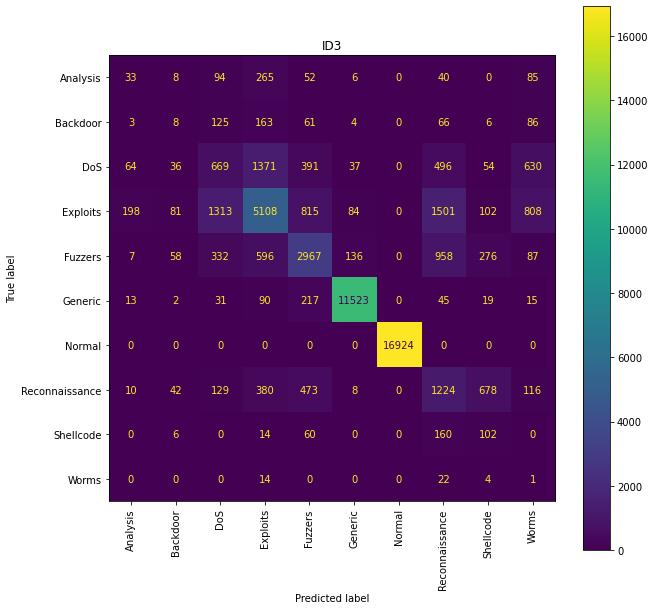

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("ID3")
ConfusionMatrixDisplay.from_predictions(reals, predictions, xticks_rotation=90, ax=ax)
acc = accuracy_score(reals, predictions)
print("Accuracy:",acc)

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

### No improvements done

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

### Not doing bonus part

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

Already written in conffusion matrix in previous section

# 7. Comparison with Libraries

In [23]:
# Import sklearn library's models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder

sklearn_pipe = Pipeline([
    ("ordinal", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ("imputer", SimpleImputer(strategy='most_frequent'))
]) 

sklearn_pipe.fit(train_set_piped.drop(columns=["attack_cat"]))

Pipeline(steps=[('ordinal',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=nan)),
                ('imputer', SimpleImputer(strategy='most_frequent'))])

## KNN

Training time: 0.11989307403564453s
Prediction time: 2.3490307331085205s
Accuracy: 0.7939431960761948


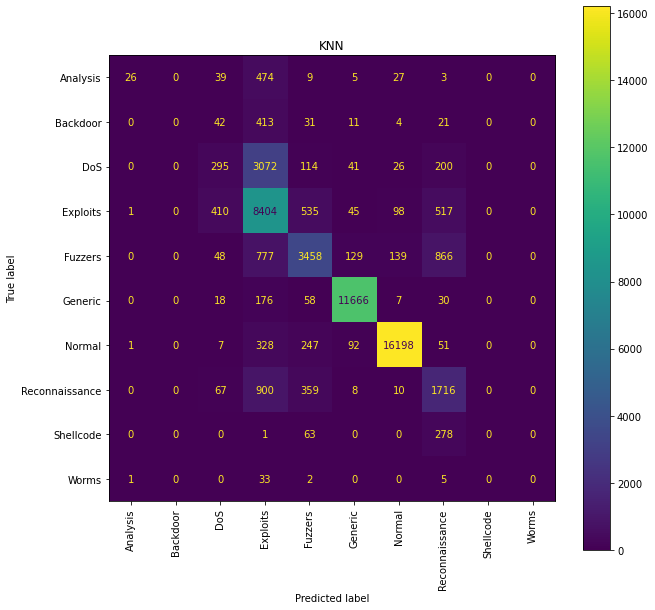

In [30]:
knnlib = KNeighborsClassifier(n_neighbors=100)
trainStart = time()
knnlib.fit(sklearn_pipe.transform(train_set_piped.drop(columns=["attack_cat"])), train_set_piped["attack_cat"])
trainEnd = time()
print("Training time: "+str(trainEnd-trainStart)+"s")

predictStart = time()
predictions = knnlib.predict(sklearn_pipe.transform(val_set_piped.drop(columns=["attack_cat"])))
predictEnd = time()
print("Prediction time: "+str(predictEnd-predictStart)+"s")
reals = val_set_piped["attack_cat"].to_numpy()

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("KNN")
ConfusionMatrixDisplay.from_predictions(reals, predictions, xticks_rotation=90, ax=ax)
acc = accuracy_score(reals, predictions)
print("Accuracy:",acc)

## Naive Bayes

Training time: 0.28313422203063965s
Prediction time: 0.043055057525634766s
Accuracy: 0.7486597467776891


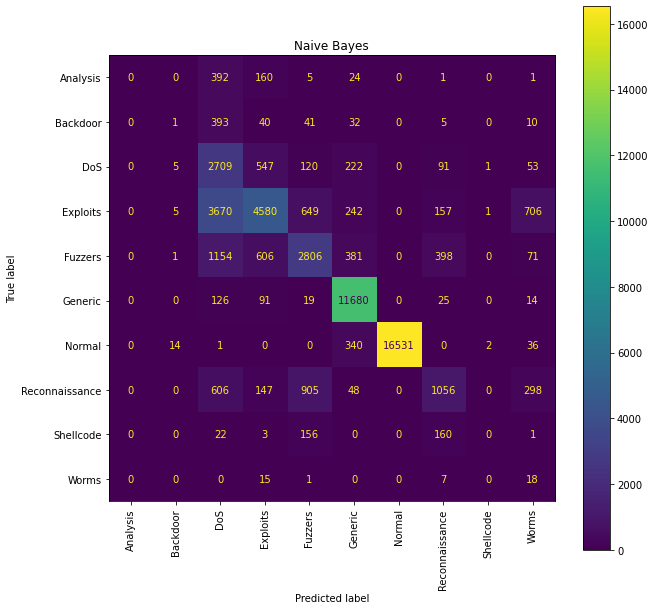

In [33]:
nblib = CategoricalNB()
trainStart = time()
nblib.fit(sklearn_pipe.transform(train_set_piped.drop(columns=["attack_cat"])), train_set_piped["attack_cat"])
trainEnd = time()
print("Training time: "+str(trainEnd-trainStart)+"s")

predictStart = time()
predictions = nblib.predict(sklearn_pipe.transform(val_set_piped.drop(columns=["attack_cat"])))
predictEnd = time()
print("Prediction time: "+str(predictEnd-predictStart)+"s")
reals = val_set_piped["attack_cat"].to_numpy()

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Naive Bayes")
ConfusionMatrixDisplay.from_predictions(reals, predictions, xticks_rotation=90, ax=ax)
acc = accuracy_score(reals, predictions)
print("Accuracy:",acc)

## ID3

Training time: 0.2302989959716797s
Prediction time: 0.03450441360473633s
Accuracy: 0.8071746321432646


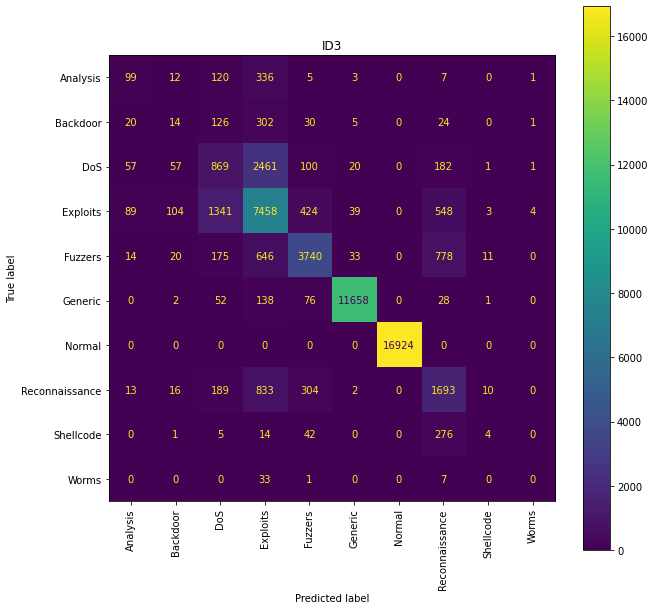

In [29]:
dtllib = DecisionTreeClassifier()
trainStart = time()
dtllib.fit(sklearn_pipe.transform(train_set_piped.drop(columns=["attack_cat"])), train_set_piped["attack_cat"])
trainEnd = time()
print("Training time: "+str(trainEnd-trainStart)+"s")


predictStart = time()
predictions = dtllib.predict(sklearn_pipe.transform(val_set_piped.drop(columns=["attack_cat"])))
predictEnd = time()
print("Prediction time: "+str(predictEnd-predictStart)+"s")
reals = val_set_piped["attack_cat"].to_numpy()

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("ID3")
ConfusionMatrixDisplay.from_predictions(reals, predictions, xticks_rotation=90, ax=ax)
acc = accuracy_score(reals, predictions)
print("Accuracy:",acc)